# Segment Normal Distribution

We are computing the limit of equidistant gaussian mixture along a line-segment...


In [11]:
using Distributions
push!(LOAD_PATH, "src");
using Geometry

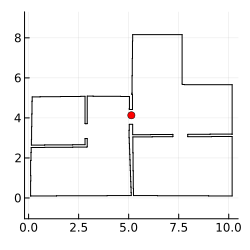

In [12]:
using JLD2
using Plots
using StatsBase: mean
using Geometry: Segment, dist, bounding_box, diff, norm

fname = "data/data.jld2"
d = load_object(fname)
env = d[:env][:segs];

center = mean(bounding_box(env))

plot(size=(250,250), aspect_ratio=:equal, legend=false)
plot!(env, c=:black)
scatter!([center], c=:red)

In [49]:
using LinearAlgebra
function segnormal_pdf(x::Vector{Float64}, s::Segment, sig::Float64=1.0)
    if s.y == s.x
        p0 = pdf(Normal(0, sig), 0)
        return p0*pdf(Normal(0, sig), norm(s.x - x))
    end
    v  = s.y - s.x
    iv = [v[2];v[1]]
    w  = abs(dot(iv/norm(iv), s.x - x ))
    v1 = dot( v/norm(v) , s.x - x )
    v2 = dot( v/norm(v) , s.y - x )
    integral = cdf(Normal(0,sig), v2) - cdf(Normal(0,sig), v1)
    pw = pdf(Normal(0,sig), w)
    return 1/norm(v)*pw*integral
end

segnormal_pdf (generic function with 2 methods)

In [73]:
segs = [
    Segment([0;0],[1;0]),
    Segment([1;0],[1;3]),
    Segment([0;0],[0;0]),
    Segment([0;0.5],[0.2;0.5])
]
bb =bounding_box(segs)
Q = Product([Uniform(bb[1][1]-0.5,bb[2][1]+0.5), Uniform(bb[1][2]-0.5,bb[2][2]+0.5)])
xs = [rand(Q) for t=1:3000]
xs[1]

2-element Vector{Float64}:
 -0.3113107977818821
  1.1755040416380633

8.31640716379133e-15
0.5789509481100283


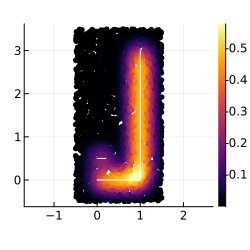

In [75]:
vs = []
sig = 0.2
for x in xs
    ps = [segnormal_pdf(x, s, sig) for s in segs]
    ws = [norm(s) for s in segs]
    ws = ws/sum(ws)
    push!(vs, sum(ws.*ps))
end
println(minimum(vs))
println(maximum(vs))
perm = sortperm(vs)
plot(size=(250,250), aspect_ratio=:equal)
scatter!(xs[perm], zcolor=vs[perm], markerstrokewidth=0, markersize=3, label=nothing)
plot!(segs, c=:white, label=nothing)

In [76]:
segs = env
bb =bounding_box(segs)
Q = Product([Uniform(bb[1][1]-0.5,bb[2][1]+0.5), Uniform(bb[1][2]-0.5,bb[2][2]+0.5)])
xs = [rand(Q) for t=1:5000]
xs[1]

2-element Vector{Float64}:
 -0.15871931403189846
  6.701426332408479

0.00023933614185628105
0.036513969965676074


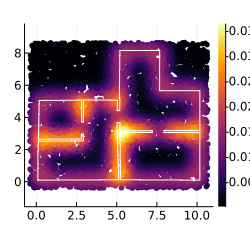

In [77]:
vs = []
sig = 0.5
for x in xs
    ps = [segnormal_pdf(x, s, sig) for s in segs]
    ws = [norm(s) for s in segs]
    ws = ws/sum(ws)
    push!(vs, sum(ws.*ps))
end
println(minimum(vs))
println(maximum(vs))
perm = sortperm(vs)
plot(size=(250,250), aspect_ratio=:equal)
scatter!(xs[perm], zcolor=vs[perm], markerstrokewidth=0, markersize=3, label=nothing)
plot!(segs, c=:white, label=nothing)

In [ ]:
function segnormal_pdf_approx(x::Vector{Float64}, s::Segment, sig::Float64=1.0; N = 10)
    v = s.y - s.x
    ys = [s.x + i/N*v for i=0:N]
    return sum([1/(N+1)*pdf(Normal(0,sig), norm(x - ys[i+1])) for i=0:N])
end

function segnormal_pdf_approx_2(x::Vector{Float64}, s::Segment, sig::Float64=1.0)
    v = s.y - s.x
    N = max(1,Int(ceil(norm(v)/0.01)))
    segnormal_pdf_approx(x, s, sig; N = N)
end

seg = Segment([0.25;0.5], [0.75;0.5])
sig = .1
xs = [rand(2) for t=1:100];

errs = []
for e=1:5
    N = 10^e
    vs = abs.(segnormal_pdf.(xs,[seg],[sig]) - segnormal_pdf_approx.(xs,[seg],[sig]; N=N))
    push!(errs, maximum(vs))
    println("N=N^$(e)\terr=$(maximum(vs))")
end
plot(errs, size=(400,100))